## Predicting NBA Player USG%

### 1. Imports & Functions

In [1]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.linear_model import RidgeCV
import patsy


import seaborn as sns
import matplotlib.pyplot as plt

### 2. Loading in DataFrame

In [2]:
# loading in data
full_player_data_df = pd.read_csv("player_data.csv")

In [3]:
pd.set_option("display.max_columns", None)
full_player_data_df

,Player,Pos,Age,Tm,BMI,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,player_id,Height,Weight,Dist.,%2P,%0-3,%3-10,%10-16,%16-3P,%3P,Games_Missed,Pct_Games_Missed,0-3_A,3-10_A,10-16_A,16-3P_A
0,Álex Abrines,SG,23,OKC,23.109796,68,6,15.5,2.0,5.0,0.393,1.4,3.6,0.381,0.6,1.4,0.426,0.531,0.6,0.7,0.898,0.3,1.0,1.3,0.6,0.5,0.1,0.5,1.7,6.0,10.1,0.560,0.724,0.144,1.9,7.1,4.5,5.5,1.7,0.6,8.3,15.9,1.2,0.9,2.1,0.096,-1.3,-0.4,-1.6,0.1,abrinal01,78.0,200.0,20.6,0.276,0.120,0.047,0.044,0.065,0.724,14,0.170732,0.6000,0.2350,0.2200,0.3250
1,Steven Adams,C,23,OKC,27.042386,80,80,29.9,4.7,8.2,0.571,0.0,0.0,0.000,4.7,8.2,0.572,0.571,2.0,3.2,0.611,3.5,4.2,7.7,1.1,1.1,1.0,1.8,2.4,11.3,16.5,0.589,0.002,0.392,13.0,15.4,14.2,5.4,1.8,2.6,16.0,16.2,3.3,3.1,6.5,0.130,-0.2,0.0,-0.2,1.1,adamsst01,83.0,265.0,3.7,0.998,0.557,0.388,0.046,0.005,0.002,2,0.024390,4.5674,3.1816,0.3772,0.0410
2,Arron Afflalo,SG,31,SAC,24.899646,61,45,25.9,3.0,6.9,0.440,1.0,2.5,0.411,2.0,4.4,0.457,0.514,1.4,1.5,0.892,0.1,1.9,2.0,1.3,0.3,0.1,0.7,1.7,8.4,8.9,0.559,0.360,0.221,0.7,8.4,4.6,7.4,0.7,0.3,8.4,14.4,1.2,0.2,1.4,0.043,-2.1,-1.5,-3.6,-0.7,afflaar01,77.0,210.0,16.8,0.640,0.100,0.117,0.186,0.236,0.360,21,0.256098,0.6900,0.8073,1.2834,1.6284
3,Alexis Ajinça,C,28,NOP,23.572742,39,15,15.0,2.3,4.6,0.500,0.0,0.1,0.000,2.3,4.5,0.511,0.500,0.7,1.0,0.725,1.2,3.4,4.5,0.3,0.5,0.6,0.8,2.0,5.3,12.9,0.529,0.022,0.225,8.3,23.8,16.0,3.1,1.7,3.1,13.7,17.2,0.0,0.9,1.0,0.080,-4.0,0.7,-3.3,-0.2,ajincal01,86.0,248.0,9.0,0.978,0.348,0.253,0.107,0.270,0.022,43,0.524390,1.6008,1.1638,0.4922,1.2420
4,Cole Aldrich,C,28,MIN,25.511685,62,0,8.6,0.7,1.4,0.523,0.0,0.0,0.000,0.7,1.4,0.523,0.523,0.2,0.4,0.682,0.8,1.7,2.5,0.4,0.4,0.4,0.3,1.4,1.7,12.7,0.549,0.000,0.256,11.0,23.9,17.4,6.4,2.4,3.7,15.1,9.4,0.6,0.7,1.3,0.116,-2.3,1.5,-0.8,0.2,aldrico01,83.0,250.0,3.0,1.000,0.581,0.407,0.012,0.000,0.000,20,0.243902,0.8134,0.5698,0.0168,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1548,Jonas Valančiūnas,C,26,TOT,27.042386,49,27,22.3,6.1,11.0,0.559,0.3,1.0,0.292,5.9,10.0,0.586,0.572,3.0,3.8,0.795,2.2,6.4,8.6,1.4,0.4,1.1,1.8,3.0,15.6,24.4,0.616,0.089,0.344,10.7,31.4,21.1,12.0,0.8,4.4,12.7,28.5,2.2,1.9,4.2,0.183,2.2,0.4,2.6,1.3,valanjo01,83.0,265.0,7.0,0.911,0.390,0.375,0.115,0.030,0.089,33,0.402439,4.2900,4.1250,1.2650,0.3300
1549,Christian Wood,PF,23,TOT,22.373885,21,2,12.0,2.9,5.6,0.521,0.4,1.2,0.346,2.5,4.3,0.571,0.560,2.0,2.7,0.732,0.8,3.1,4.0,0.4,0.3,0.5,0.8,0.8,8.2,21.9,0.607,0.222,0.479,7.2,26.5,17.0,4.8,1.3,3.2,10.7,26.1,0.4,0.3,0.8,0.151,1.4,-1.0,0.4,0.1,woodch01,82.0,214.0,9.2,0.778,0.427,0.248,0.051,0.051,0.222,61,0.743902,2.3912,1.3888,0.2856,0.2856
1550,Delon Wright,PG,26,TOT,21.935402,75,13,22.7,3.2,7.4,0.434,0.7,2.2,0.298,2.6,5.2,0.492,0.478,1.6,2.0,0.793,0.9,2.6,3.5,3.3,1.2,0.4,1.0,1.4,8.7,15.5,0.523,0.301,0.269,4.4,12.8,8.6,21.6,2.5,1.6,11.0,18.1,1.9,2.4,4.3,0.121,0.1,1.4,1.5,1.5,wrighde01,77.0,185.0,10.8,0.699,0.401,0.206,0.065,0.027,0.301,7,0.085366,2.9674,1.5244,0.4810,0.1998
1551,Tyler Zeller,C,29,TOT,25.206774,6,1,15.5,2.7,5.0,0.533,0.0,0.2,0.000,2.7,4.8,0.552,0.533,2.3,3.0,0.778,1.8,2.2,4.0,0.7,0.2,0.5,0.7,3.3,7.7,17.3,0.607,0.033,0.600,12.9,15.7,14.2,6.7,0.5,3.1,9.5,20.1,0.2,0.1,0.3,0.167,-3.1,-1.9,-5.0,-0.1,zellety01,84.0,253.0,4.8,0.967,0.433,0.500,0.033,0.000,0.033,76,0.926829,2.1650,2.5000,0.1650,0.0000


In [4]:
# adding points per min column
full_player_data_df['PPM'] = (full_player_data_df['G']*full_player_data_df['PTS']) / (full_player_data_df['G']*full_player_data_df['MP'])
full_player_data_df

,Player,Pos,Age,Tm,BMI,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,player_id,Height,Weight,Dist.,%2P,%0-3,%3-10,%10-16,%16-3P,%3P,Games_Missed,Pct_Games_Missed,0-3_A,3-10_A,10-16_A,16-3P_A,PPM
0,Álex Abrines,SG,23,OKC,23.109796,68,6,15.5,2.0,5.0,0.393,1.4,3.6,0.381,0.6,1.4,0.426,0.531,0.6,0.7,0.898,0.3,1.0,1.3,0.6,0.5,0.1,0.5,1.7,6.0,10.1,0.560,0.724,0.144,1.9,7.1,4.5,5.5,1.7,0.6,8.3,15.9,1.2,0.9,2.1,0.096,-1.3,-0.4,-1.6,0.1,abrinal01,78.0,200.0,20.6,0.276,0.120,0.047,0.044,0.065,0.724,14,0.170732,0.6000,0.2350,0.2200,0.3250,0.387097
1,Steven Adams,C,23,OKC,27.042386,80,80,29.9,4.7,8.2,0.571,0.0,0.0,0.000,4.7,8.2,0.572,0.571,2.0,3.2,0.611,3.5,4.2,7.7,1.1,1.1,1.0,1.8,2.4,11.3,16.5,0.589,0.002,0.392,13.0,15.4,14.2,5.4,1.8,2.6,16.0,16.2,3.3,3.1,6.5,0.130,-0.2,0.0,-0.2,1.1,adamsst01,83.0,265.0,3.7,0.998,0.557,0.388,0.046,0.005,0.002,2,0.024390,4.5674,3.1816,0.3772,0.0410,0.377926
2,Arron Afflalo,SG,31,SAC,24.899646,61,45,25.9,3.0,6.9,0.440,1.0,2.5,0.411,2.0,4.4,0.457,0.514,1.4,1.5,0.892,0.1,1.9,2.0,1.3,0.3,0.1,0.7,1.7,8.4,8.9,0.559,0.360,0.221,0.7,8.4,4.6,7.4,0.7,0.3,8.4,14.4,1.2,0.2,1.4,0.043,-2.1,-1.5,-3.6,-0.7,afflaar01,77.0,210.0,16.8,0.640,0.100,0.117,0.186,0.236,0.360,21,0.256098,0.6900,0.8073,1.2834,1.6284,0.324324
3,Alexis Ajinça,C,28,NOP,23.572742,39,15,15.0,2.3,4.6,0.500,0.0,0.1,0.000,2.3,4.5,0.511,0.500,0.7,1.0,0.725,1.2,3.4,4.5,0.3,0.5,0.6,0.8,2.0,5.3,12.9,0.529,0.022,0.225,8.3,23.8,16.0,3.1,1.7,3.1,13.7,17.2,0.0,0.9,1.0,0.080,-4.0,0.7,-3.3,-0.2,ajincal01,86.0,248.0,9.0,0.978,0.348,0.253,0.107,0.270,0.022,43,0.524390,1.6008,1.1638,0.4922,1.2420,0.353333
4,Cole Aldrich,C,28,MIN,25.511685,62,0,8.6,0.7,1.4,0.523,0.0,0.0,0.000,0.7,1.4,0.523,0.523,0.2,0.4,0.682,0.8,1.7,2.5,0.4,0.4,0.4,0.3,1.4,1.7,12.7,0.549,0.000,0.256,11.0,23.9,17.4,6.4,2.4,3.7,15.1,9.4,0.6,0.7,1.3,0.116,-2.3,1.5,-0.8,0.2,aldrico01,83.0,250.0,3.0,1.000,0.581,0.407,0.012,0.000,0.000,20,0.243902,0.8134,0.5698,0.0168,0.0000,0.197674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1548,Jonas Valančiūnas,C,26,TOT,27.042386,49,27,22.3,6.1,11.0,0.559,0.3,1.0,0.292,5.9,10.0,0.586,0.572,3.0,3.8,0.795,2.2,6.4,8.6,1.4,0.4,1.1,1.8,3.0,15.6,24.4,0.616,0.089,0.344,10.7,31.4,21.1,12.0,0.8,4.4,12.7,28.5,2.2,1.9,4.2,0.183,2.2,0.4,2.6,1.3,valanjo01,83.0,265.0,7.0,0.911,0.390,0.375,0.115,0.030,0.089,33,0.402439,4.2900,4.1250,1.2650,0.3300,0.699552
1549,Christian Wood,PF,23,TOT,22.373885,21,2,12.0,2.9,5.6,0.521,0.4,1.2,0.346,2.5,4.3,0.571,0.560,2.0,2.7,0.732,0.8,3.1,4.0,0.4,0.3,0.5,0.8,0.8,8.2,21.9,0.607,0.222,0.479,7.2,26.5,17.0,4.8,1.3,3.2,10.7,26.1,0.4,0.3,0.8,0.151,1.4,-1.0,0.4,0.1,woodch01,82.0,214.0,9.2,0.778,0.427,0.248,0.051,0.051,0.222,61,0.743902,2.3912,1.3888,0.2856,0.2856,0.683333
1550,Delon Wright,PG,26,TOT,21.935402,75,13,22.7,3.2,7.4,0.434,0.7,2.2,0.298,2.6,5.2,0.492,0.478,1.6,2.0,0.793,0.9,2.6,3.5,3.3,1.2,0.4,1.0,1.4,8.7,15.5,0.523,0.301,0.269,4.4,12.8,8.6,21.6,2.5,1.6,11.0,18.1,1.9,2.4,4.3,0.121,0.1,1.4,1.5,1.5,wrighde01,77.0,185.0,10.8,0.699,0.401,0.206,0.065,0.027,0.301,7,0.085366,2.9674,1.5244,0.4810,0.1998,0.383260
1551,Tyler Zeller,C,29,TOT,25.206774,6,1,15.5,2.7,5.0,0.533,0.0,0.2,0.000,2.7,4.8,0.552,0.533,2.3,3.0,0.778,1.8,2.2,4.0,0.7,0.2,0.5,0.7,3.3,7.7,17.3,0.607,0.033,0.600,12.9,15.7,14.2,6.7,0.5,3.1,9.5,20.1,0.2,0.1,0.3,0.167,-3.1,-1.9,-5.0,-0.1,zellety01,84.0,253.0,4.8,0.967,0.433,0.500,0.033,0.000,0.033,76,0.926829,2.1650,2.5000,0.1650,0.0000,0.496774


### 3. EDA / Cleaning

In [5]:
subset = ['USG%','Age', 'Height', 'Weight', 'BMI', 'FG%', '3P%', '2P%', 'FT%', 'PPM', 'AST', 'ORB','DRB', 
                   'TRB','STL', 'BLK', 'PF','Dist.','%2P', '%0-3','%3-10', '%10-16', '%16-3P', '%3P', 'Games_Missed']

player_usg_df = full_player_data_df.loc[:,subset]

player_usg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1553 entries, 0 to 1552
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   USG%          1553 non-null   float64
 1   Age           1553 non-null   int64  
 2   Height        1553 non-null   float64
 3   Weight        1553 non-null   float64
 4   BMI           1553 non-null   float64
 5   FG%           1553 non-null   float64
 6   3P%           1553 non-null   float64
 7   2P%           1553 non-null   float64
 8   FT%           1553 non-null   float64
 9   PPM           1553 non-null   float64
 10  AST           1553 non-null   float64
 11  ORB           1553 non-null   float64
 12  DRB           1553 non-null   float64
 13  TRB           1553 non-null   float64
 14  STL           1553 non-null   float64
 15  BLK           1553 non-null   float64
 16  PF            1553 non-null   float64
 17  Dist.         1553 non-null   float64
 18  %2P           1553 non-null 

In [10]:
from sklearn.model_selection import cross_val_score, KFold
X, y = player_usg_df.drop('USG%',axis=1), player_usg_df['USG%']


lm = LinearRegression()
lm_reg = Ridge(alpha=1)
kf = KFold(n_splits=5, shuffle=True, random_state = 71)

cross_val_score(lm, X, y, cv=5,scoring='r2')

print(np.mean(cross_val_score(lm, X, y, cv=kf, scoring='r2')))
print(np.mean(cross_val_score(lm_reg, X, y, cv=kf, scoring='r2')))

0.7877766747948638
0.7889798491500852


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge #ordinary linear regression + w/ ridge regularization
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

X, y = player_usg_df.drop('USG%',axis=1), player_usg_df['USG%']

# hold out 20% of the data for final testing
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10)

In [12]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.2, random_state=3)

In [13]:
X_train.shape

(993, 24)

In [14]:
X_val.shape

(249, 24)

In [15]:
X_test.shape

(311, 24)

In [16]:
#set up the 3 models we're choosing from:

lm = LinearRegression()

#Feature scaling for train, val, and test so that we can run our ridge model on each
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

lm_reg = Ridge(alpha=1)

#Feature transforms for train, val, and test so that we can run our poly model on each
poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

lm_poly = LinearRegression()

In [17]:
#validate

lm.fit(X_train, y_train)
print(f'Linear Regression val R^2: {lm.score(X_val, y_val):.3f}')

lm_reg.fit(X_train_scaled, y_train)
print(f'Ridge Regression val R^2: {lm_reg.score(X_val_scaled, y_val):.3f}')

lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X_val_poly, y_val):.3f}')

Linear Regression val R^2: 0.663
Ridge Regression val R^2: 0.683
Degree 2 polynomial regression val R^2: -1013.149


In [18]:
lm.fit(X,y)
print(f'Linear Regression test R^2: {lm.score(X_test, y_test):.3f}')

Linear Regression test R^2: 0.768


In [19]:
lm = LinearRegression
lm_reg = Ridge(alpha=1)
features,target = subset[1:],'USG%'

X,y = player_usg_df[features], player_usg_df[target]
lm = LinearRegression() # construct LinearRegression model object
lm.fit(X,y) # fit model to our choice of features
lm_reg.fit(X,y)

print('Simple Lin Reg R^2 Score:',lm.score(X,y))
print('Ridge Regression w/ Feature Scaling R^2 Score:', lm_reg.score(X,y))

Simple Lin Reg R^2 Score: 0.8206788189320571
Ridge Regression w/ Feature Scaling R^2 Score: 0.8108389688200147


In [ ]:
preds = lm_reg.predict(X)
sns.set_style('white')
sns.jointplot(x=preds,y=y, kind='reg')

In [ ]:
sns.pairplot(player_usg_df,height=1.2, aspect=1.5);

In [ ]:
plt.subplots(figsize=(25,25))
sns.heatmap(player_usg_df.corr(), cmap='seismic', annot=True, vmin=-1, vmax=1);

### 4. Cross Validation

In [ ]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

Comparing Linear vs Ridge

In [ ]:
X,y = player_usg_df.drop('USG%', axis=1), player_usg_df['USG%']

def split_and_validate(X,y):
    X, X_test, y, y_test = train_test_split(X, y, test_size = .2, random_state=10)
    X, y = np.array(X), np.array(y)
    
    cv_lm_r2s, cv_lm_reg_r2s = [],[]
    cv_lm_r2s_tr, cv_lm_reg_r2s_tr = [],[]
    
    kf = KFold(n_splits=5, shuffle=True, random_state=10)
    
    for train_ind, val_ind in kf.split(X,y):
        X_train, y_train = X[train_ind], y[train_ind]
        X_val, y_val = X[val_ind], y[val_ind]
        
        # Linear Regression
        lm = LinearRegression()
        lm_reg = Ridge(alpha=1)

        lm.fit(X_train, y_train)
        cv_lm_r2s_tr.append(lm.score(X_train, y_train))
        cv_lm_r2s.append(lm.score(X_val, y_val))
        
        # Ridge Regression
        lm_reg = Ridge(alpha=1)
        scaler = StandardScaler()
        
        X_train_scaled = scaler.fit_transform(X_train)
        X_val_scaled = scaler.transform(X_val)
        
        lm_reg.fit(X_train_scaled, y_train)
        
        cv_lm_reg_r2s_tr.append(lm_reg.score(X_train_scaled, y_train))
        cv_lm_reg_r2s.append(lm_reg.score(X_val_scaled, y_val))
        
    print('Simple regression scores: ', cv_lm_r2s)    
    print('Ridge scores: ', cv_lm_reg_r2s)
    
    print(f'Simple mean cv r^2: {np.mean(cv_lm_r2s):.3f} +- {np.std(cv_lm_r2s):.3f}')
    print(f'Ridge mean cv r^2: {np.mean(cv_lm_reg_r2s):.3f} +- {np.std(cv_lm_reg_r2s):.3f}','\n')
    
    print('Simple regression scores (tr): ', cv_lm_r2s_tr)
    print('Ridge scores (tr): ', cv_lm_reg_r2s_tr)
    
    print(f'Simple mean cv r^2 (tr): {np.mean(cv_lm_r2s_tr):.3f} +- {np.std(cv_lm_r2s_tr):.3f}')
    print(f'Ridge mean cv r^2 (tr): {np.mean(cv_lm_reg_r2s_tr):.3f} +- {np.std(cv_lm_reg_r2s_tr):.3f}')
    

In [ ]:
split_and_validate(X,y)

In [20]:
def split_and_cross_validate(X,y):
    X,y = player_usg_df.drop('USG%', axis=1), player_usg_df['USG%']


    X, X_test, y, y_test = train_test_split(X, y, test_size = .2, random_state=24)
    X, y = np.array(X), np.array(y)

    cv_lm_reg_r2s = []
    cv_lm_reg_r2s_tr = []

    kf = KFold(n_splits=5, shuffle=True, random_state=24)

    for train_ind, val_ind in kf.split(X,y):
        X_train, y_train = X[train_ind], y[train_ind]
        X_val, y_val = X[val_ind], y[val_ind]

        # Ridge Regression
        lm_reg = Ridge(alpha=1)
        scaler = StandardScaler()

        X_train_scaled = scaler.fit_transform(X_train)
        X_val_scaled = scaler.transform(X_val)

        lm_reg.fit(X_train_scaled, y_train)

        cv_lm_reg_r2s_tr.append(lm_reg.score(X_train_scaled, y_train))
        cv_lm_reg_r2s.append(lm_reg.score(X_val_scaled, y_val))

    print('Ridge scores (Validation): ', cv_lm_reg_r2s)
    print(f'Ridge mean cv r^2: {np.mean(cv_lm_reg_r2s):.3f} +- {np.std(cv_lm_reg_r2s):.3f}','\n')

    print('Ridge scores (Validation): ', cv_lm_reg_r2s_tr)
    print(f'Ridge mean cv r^2 (Train): {np.mean(cv_lm_reg_r2s_tr):.3f} +- {np.std(cv_lm_reg_r2s_tr):.3f}','\n')

### 5. Feature Engineering

Adding Polynomial Terms:

In [21]:
split_and_cross_validate(X,y)

Ridge scores (Validation):  [0.7114105747841972, 0.6722916458856962, 0.794830601233635, 0.8688958712018323, 0.8687570902581081]
Ridge mean cv r^2: 0.783 +- 0.080 

Ridge scores (Validation):  [0.8355149341357512, 0.840646765465178, 0.8154305411837409, 0.801368588821892, 0.7996369505075098]
Ridge mean cv r^2 (Train): 0.819 +- 0.017 



In [ ]:
X2 = X.copy()
X2['PPM_x_FG%'] = X2['PPM']*X2['FG%']
X2['Height_x_FG%'] = X2['Height']*X2['FG%']
X2['Height_x_PPM%'] = X2['Height']*X2['PPM']

## 6. Final Model

In [22]:
X['PPM_x_FG%'] = X['PPM']*X['FG%']
X['Height_x_FG%'] = X['Height']*X['FG%']
X['Height_x_PPM'] = X['Height']*X['PPM']

In [24]:
X_test['PPM_x_FG%'] = X_test['PPM']*X_test['FG%']
X_test['Height_x_FG%'] = X_test['Height']*X_test['FG%']
X_test['Height_x_PPM'] = X_test['Height']*X_test['PPM']

In [25]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

lm_reg = Ridge(alpha=1)
lm_reg.fit(X_scaled,y)
print(f'Ridge Regression test R2: {lm_reg.score(X_test_scaled, y_test):.3f}')

Ridge Regression test R2: 0.773


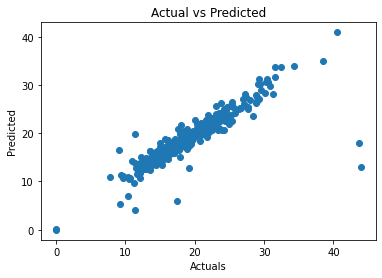

In [33]:
plt.figure(facecolor='white')
plt.title("Actual vs Predicted")
plt.xlabel("Actuals")
plt.ylabel("Predicted")
plt.scatter(y_test, lm_reg.predict(X_test_scaled))

In [ ]:
test_lm_reg = lm_reg.fit(X_scaled,y)a

In [ ]:
coeffs = list(lm_reg.coef_)
features = X.columns

In [ ]:
plt.figure(figsize=(10, 8))
plt.title('Linear Model Residuals', size=25, fontname='Verdana', y=1.03)
plt.scatter(y_test, y_test - y_test_pred, alpha=.5, color='#429ef4');

In [ ]:
coeffs_zipped = zip(features, coeffs)
features_coeffs = set(coeffs_zipped)
feat_coef_df = pd.DataFrame(features_coeffs, columns=['Features', 'Coefficients'])

In [ ]:
feat_coef_df = feat_coef_df.sort_values(by='Coefficients', ascending=False)

In [ ]:
from matplotlib import pyplot
fig,ax = pyplot.subplots(figsize=(5,10))
sns.barplot(y=feat_coef_df['Features'], x=feat_coef_df['Coefficients'])